In [1]:
#specifying the folder where images are present

In [2]:
TrainingImagePath ="C:\\Users\\sharath\\Desktop\\analysis\\DEEP LEARNING\\CNN\\Class_expt\\train_29"

In [3]:
ValidationImagePath ="C:\\Users\\sharath\\Desktop\\analysis\\DEEP LEARNING\\CNN\\Class_expt\\test_29"

In [4]:
from tensorflow import keras

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
#base model

In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
#Generating the training data

In [10]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 136 images belonging to 17 classes.


# Validation set

In [11]:
#Generating the validation data

In [12]:
validation_set = test_datagen.flow_from_directory(ValidationImagePath,
                                                target_size = (64,64),
                                                batch_size = 20,
                                                class_mode = 'categorical')

Found 34 images belonging to 17 classes.


In [13]:
# Libraries and model type

In [14]:
# Create CNN Deep learning model

In [15]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [16]:
# Initializing the Convolutional Neural Network

In [17]:
classifier = Sequential()

# MODEL

In [18]:
# STEP 1 Convolution
# Adding th e first layer of CNN
# We are using the format (64,64,3) because we are using Tensorflow backend
# It means 3 matrix of size (64x64) pixels representing Red, Green and Blue components of pixels

In [19]:
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [20]:
#STEP 2- Max Pooling

In [21]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [22]:
# Additional layer of convolution for better accuracy

In [23]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [24]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [25]:
#STEP 3- Flattening

In [26]:
classifier.add(Flatten())

In [27]:
#STEP 4 - Fully connected neural network

In [28]:
classifier.add(Dense(64, activation='relu'))

In [29]:
classifier.add(Dense(17, activation='softmax'))

In [30]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 64)                8

# Compiler

In [31]:
# Compiling the CNN

In [32]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer = 'adam', metrics =['accuracy'])

# Execution of model

In [33]:
# Starting the model training

In [34]:
history = classifier.fit_generator(training_set, epochs =20,
                                  validation_data=validation_set)

C:\Users\sharath\AppData\Local\Temp/ipykernel_20856/2354014473.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =20,


Epoch 1/20
7/7 [==============================] - 30s 4s/step - loss: 2.9353 - accuracy: 0.0441 - val_loss: 2.7829 - val_accuracy: 0.1765
Epoch 2/20
7/7 [==============================] - 19s 3s/step - loss: 2.6535 - accuracy: 0.4412 - val_loss: 2.6477 - val_accuracy: 0.2941
Epoch 3/20
7/7 [==============================] - 18s 3s/step - loss: 2.3466 - accuracy: 0.3676 - val_loss: 2.4879 - val_accuracy: 0.3235
Epoch 4/20
7/7 [==============================] - 19s 3s/step - loss: 1.7746 - accuracy: 0.6544 - val_loss: 2.2508 - val_accuracy: 0.4118
Epoch 5/20
7/7 [==============================] - 19s 3s/step - loss: 1.2167 - accuracy: 0.7279 - val_loss: 2.0031 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 20s 3s/step - loss: 0.7657 - accuracy: 0.8382 - val_loss: 1.8658 - val_accuracy: 0.5294
Epoch 7/20
7/7 [==============================] - 20s 3s/step - loss: 0.3814 - accuracy: 0.9338 - val_loss: 2.1672 - val_accuracy: 0.5000
Epoch 8/20
7/7 [==================

# Accuracy base model

In [35]:
#Displaying curves of loss and accuracy during training

In [36]:
import matplotlib.pyplot as plt

In [37]:
acc = history.history['accuracy']

In [38]:
val_acc = history.history['val_accuracy']

In [39]:
loss = history.history['loss']

In [40]:
val_loss = history.history['val_loss']

In [41]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

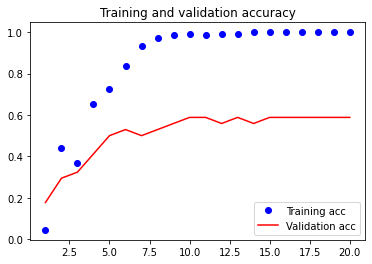

<Figure size 432x288 with 0 Axes>

In [42]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Loss base model

<Figure size 432x288 with 0 Axes>

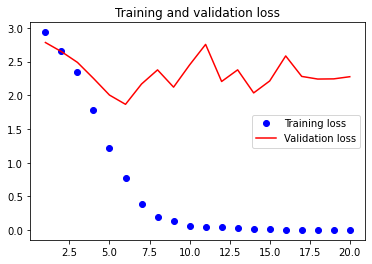

<Figure size 432x288 with 0 Axes>

In [43]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [44]:
# Lets improve

In [45]:
# Model 2

In [46]:
# Adding parameters in the ImageDatagenerator

In [47]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.5,
                                  zoom_range=0.5, width_shift_range=0.2,
                                  height_shift_range=0.2)

In [48]:
# No transformations are done on the testing images

In [49]:
test_datgen = ImageDataGenerator(rescale=1./255)

In [50]:
# Generating the training data

In [51]:
training_set = train_datagen.flow_from_directory(TrainingImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 136 images belonging to 17 classes.


In [52]:
# Generating the validation data

In [53]:
validation_set = test_datagen.flow_from_directory(ValidationImagePath,
                                                target_size=(64,64),
                                                batch_size=20,
                                                class_mode='categorical')

Found 34 images belonging to 17 classes.


In [54]:
#Create Cnn deep learning model

In [55]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [56]:
# Initializing the Convolutional Neural Network

In [57]:
classifier = Sequential()

In [58]:
# Convolution

In [59]:
classifier.add(Convolution2D(32, kernel_size=(3,3),
                            input_shape=(64,64,3), activation ='relu'))

In [60]:
#Max Pooling

In [61]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [62]:
# Additional layer of convolution for better accuracy

In [63]:
classifier.add(Convolution2D(64, kernel_size=(3,3), activation='relu'))

In [64]:
classifier.add(MaxPool2D(pool_size=(2,2)))

In [65]:
#Flattening

In [66]:
classifier.add(Flatten())

In [67]:
#Fully connected neural network

In [68]:
classifier.add(Dense(64, activation='relu'))#hidden layer

In [69]:
classifier.add(Dense(17, activation='softmax'))#output layer

In [70]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [71]:
#Compiler

In [72]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer='adam', metrics=['accuracy'])

In [73]:
#Execute

In [74]:
#Starting the model training

In [75]:
history = classifier.fit_generator(training_set, epochs =100,
                                  validation_data=validation_set)

C:\Users\sharath\AppData\Local\Temp/ipykernel_20856/346272482.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(training_set, epochs =100,


Epoch 1/100
7/7 [==============================] - 23s 3s/step - loss: 2.9263 - accuracy: 0.0368 - val_loss: 2.8018 - val_accuracy: 0.0882
Epoch 2/100
7/7 [==============================] - 17s 3s/step - loss: 2.7827 - accuracy: 0.1544 - val_loss: 2.7684 - val_accuracy: 0.0588
Epoch 3/100
7/7 [==============================] - 18s 3s/step - loss: 2.6951 - accuracy: 0.1691 - val_loss: 2.6841 - val_accuracy: 0.0882
Epoch 4/100
7/7 [==============================] - 18s 3s/step - loss: 2.5317 - accuracy: 0.2500 - val_loss: 2.6288 - val_accuracy: 0.1471
Epoch 5/100
7/7 [==============================] - 18s 3s/step - loss: 2.3311 - accuracy: 0.3750 - val_loss: 2.4897 - val_accuracy: 0.2353
Epoch 6/100
7/7 [==============================] - 18s 3s/step - loss: 2.1167 - accuracy: 0.3824 - val_loss: 2.3083 - val_accuracy: 0.3235
Epoch 7/100
7/7 [==============================] - 18s 3s/step - loss: 1.8724 - accuracy: 0.4412 - val_loss: 2.4284 - val_accuracy: 0.3235
Epoch 8/100
7/7 [==========

7/7 [==============================] - 20s 3s/step - loss: 0.2217 - accuracy: 0.9265 - val_loss: 4.2067 - val_accuracy: 0.6471
Epoch 60/100
7/7 [==============================] - 21s 3s/step - loss: 0.2819 - accuracy: 0.9191 - val_loss: 4.1701 - val_accuracy: 0.6471
Epoch 61/100
7/7 [==============================] - 21s 3s/step - loss: 0.1968 - accuracy: 0.9485 - val_loss: 4.3630 - val_accuracy: 0.6471
Epoch 62/100
7/7 [==============================] - 19s 3s/step - loss: 0.2025 - accuracy: 0.9412 - val_loss: 4.5279 - val_accuracy: 0.6471
Epoch 63/100
7/7 [==============================] - 20s 3s/step - loss: 0.2523 - accuracy: 0.8971 - val_loss: 4.2784 - val_accuracy: 0.6176
Epoch 64/100
7/7 [==============================] - 19s 3s/step - loss: 0.2509 - accuracy: 0.9118 - val_loss: 4.1545 - val_accuracy: 0.6471
Epoch 65/100
7/7 [==============================] - 20s 3s/step - loss: 0.2502 - accuracy: 0.9191 - val_loss: 4.8141 - val_accuracy: 0.6471
Epoch 66/100
7/7 [===============

In [76]:
#Displaying curves of loss and accuracy during training

In [77]:
import matplotlib.pyplot as plt

In [78]:
acc = history.history['accuracy']

In [79]:
val_acc = history.history['val_accuracy']

In [80]:
loss = history.history['loss']

In [81]:
val_loss = history.history['val_loss']

In [82]:
epochs = range(1, len(acc) + 1)

<Figure size 432x288 with 0 Axes>

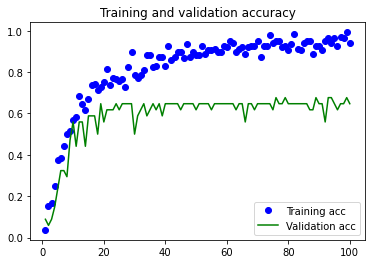

<Figure size 432x288 with 0 Axes>

In [83]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

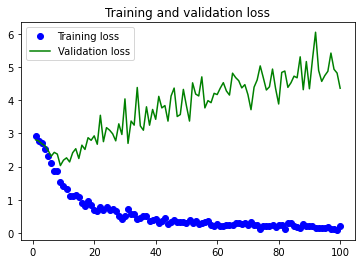

<Figure size 432x288 with 0 Axes>

In [84]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()